/* Addresses growth overtime in the Ethereum node */

The question will answer how the number of users were increasing in the ethereum network over time. This is done by considering the dates of users performing their first transaction.

SELECT from_address,block_timestamp
FROM `bigquery-public-data.crypto_ethereum.transactions`
WHERE value > 0 AND block_timestamp < '2021-09-01 00:00:00';

/*From address where where the first transaction was done by the address has to be taken*/

SELECT from_address AS address, MIN(DATE(block_timestamp)) AS first_transaction  /* hence the minimal date of timestamp for the address*/
FROM `bigquery-public-data.crypto_ethereum.transactions`
WHERE value > 0 AND block_timestamp < '2021-09-01 00:00:00'
GROUP BY address
ORDER BY first_transaction;


/* Grouping data on the number of addresses that were making their first transaction and storing their count*/
SELECT first_tx AS date, COUNT(*) AS no_of_addresses
    FROM (
        SELECT from_address AS address, MIN(DATE(block_timestamp)) AS first_tx
        FROM `bigquery-public-data.crypto_ethereum.transactions`
        WHERE value > 0 AND block_timestamp < '2022-01-01 00:00:00'
        GROUP BY address
        ORDER BY first_tx
    )
    GROUP BY first_tx
    ORDER BY date;

/* Ordering them in descending order before storing the 1GB of results as CSV*/
SELECT first_tx AS date, COUNT(*) AS no_of_addresses
    FROM (
        SELECT from_address AS address, MIN(DATE(block_timestamp)) AS first_tx
        FROM `bigquery-public-data.crypto_ethereum.transactions`
        WHERE value > 0 AND block_timestamp < '2022-01-01 00:00:00'
        GROUP BY address
        ORDER BY first_tx
    )
    GROUP BY first_tx
    ORDER BY date desc

In [2]:
import pandas as pd
URL = 'https://drive.google.com/file/d/1I3GS7ZM5udQJX2eXyxdMxdsOEkosYuA2/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df = pd.read_csv(path)
df.head()

,date,no_of_addresses
0,2021-12-31,74377
1,2021-12-30,79145
2,2021-12-29,70444
3,2021-12-28,80728
4,2021-12-27,78986


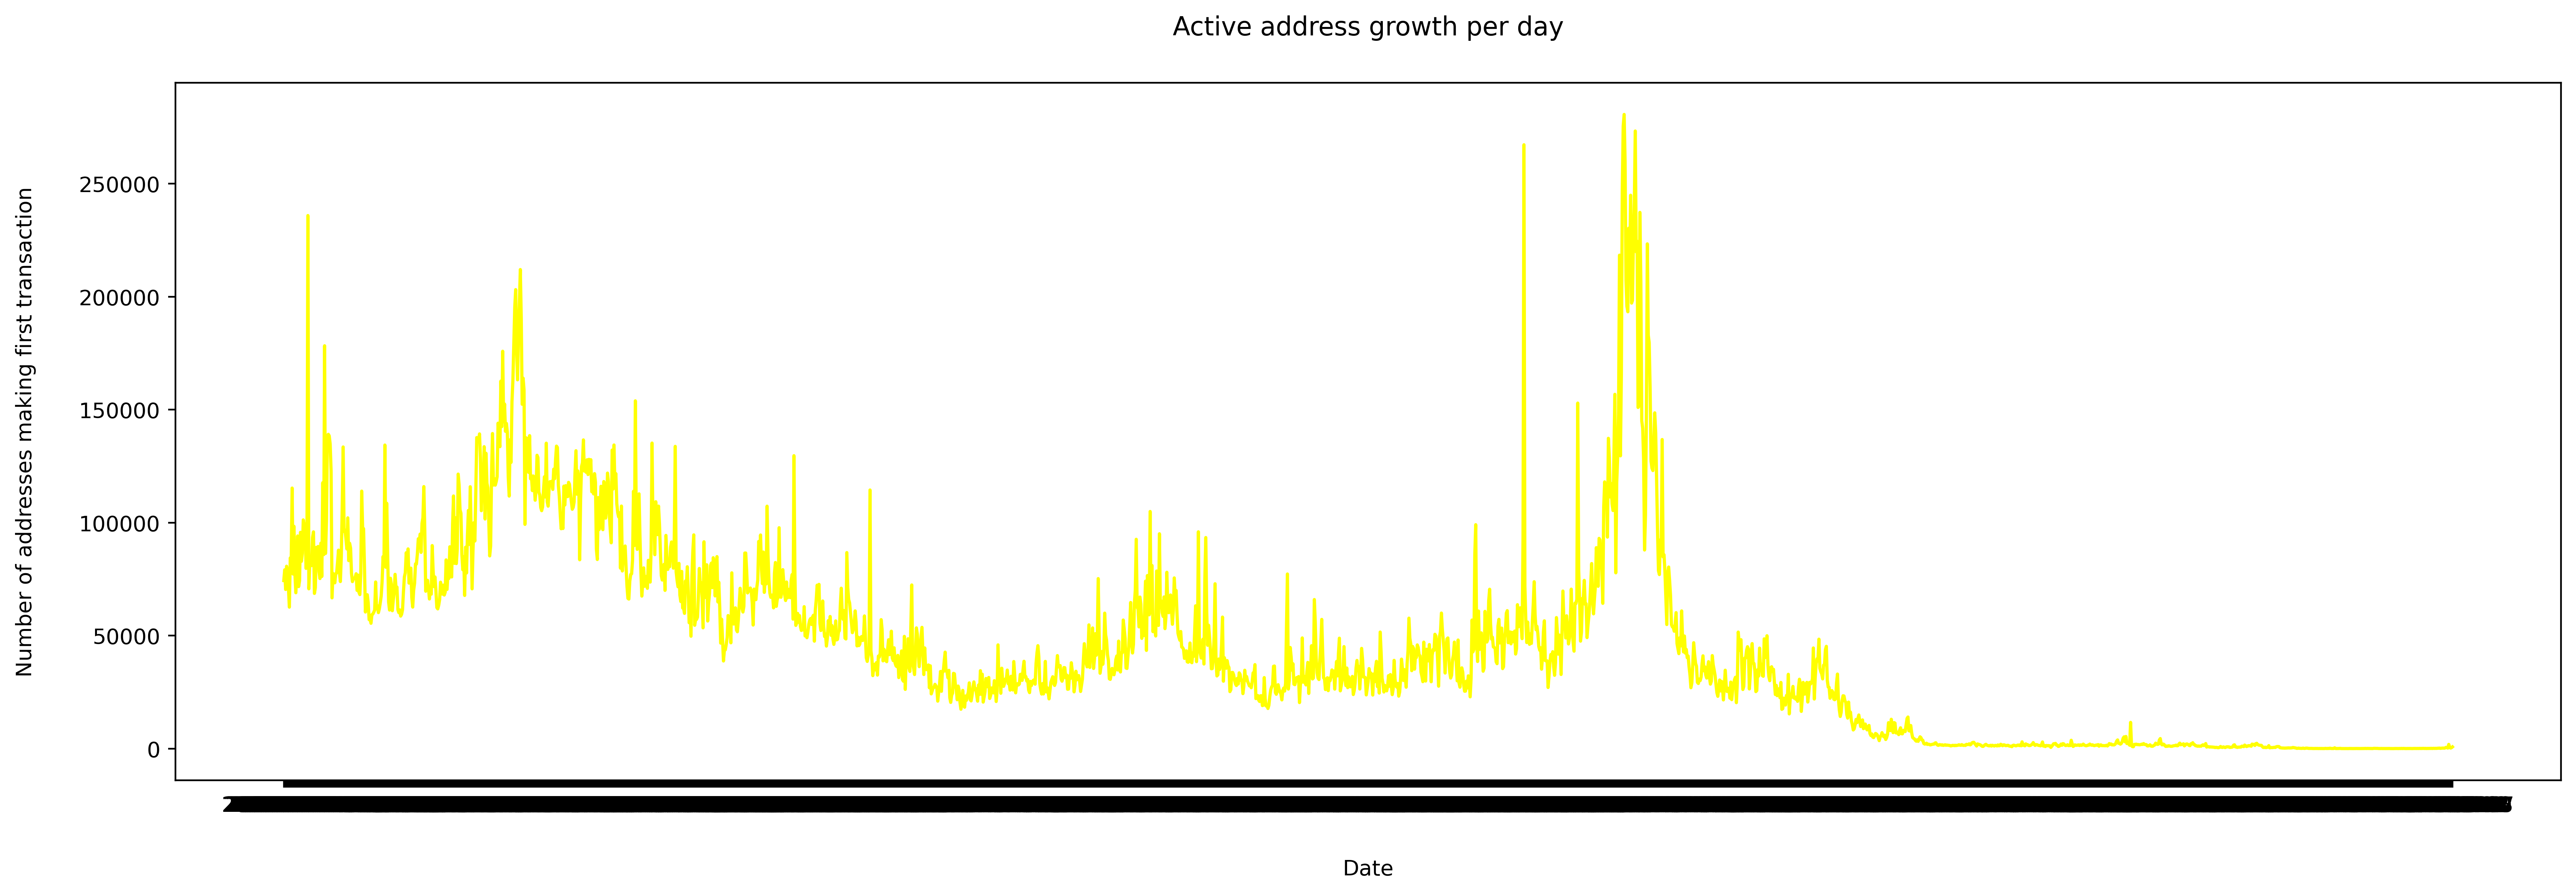

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

fig, axs = plt.subplots(figsize=(20, 6))
plt.title("Active address growth per day", y=1.05)
plt.xlabel("Date", labelpad=20)
plt.ylabel("Number of addresses making first transaction", labelpad=20)
sns.lineplot(x="date", y="no_of_addresses", data=df, color="yellow")
plt.gcf().set_dpi(400)
plt.show(fig)

Hence the highest number of addresses that were created and making their first transaction were 280641 on 2018-01-16
Note: Applicable only to the 1GB of sample that was taken from 80 GB

In [9]:
#df['no_of_addresses'].max()
print(df[df.no_of_addresses == df.no_of_addresses.max()])

            date  no_of_addresses
1445  2018-01-16           280641
